# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report 

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# Loading and Analysing Dataset

In [2]:
# load the dataset

data = pd.read_csv('Data/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.shape

(150, 6)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Data Visualization

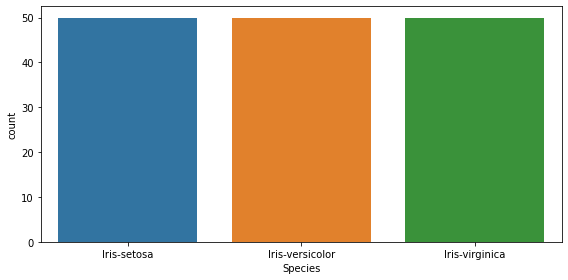

In [6]:
# Histogram based on count of each label in the dataset

plt.figure(figsize=(8,4))
sns.countplot(x = data['Species'])
plt.tight_layout()

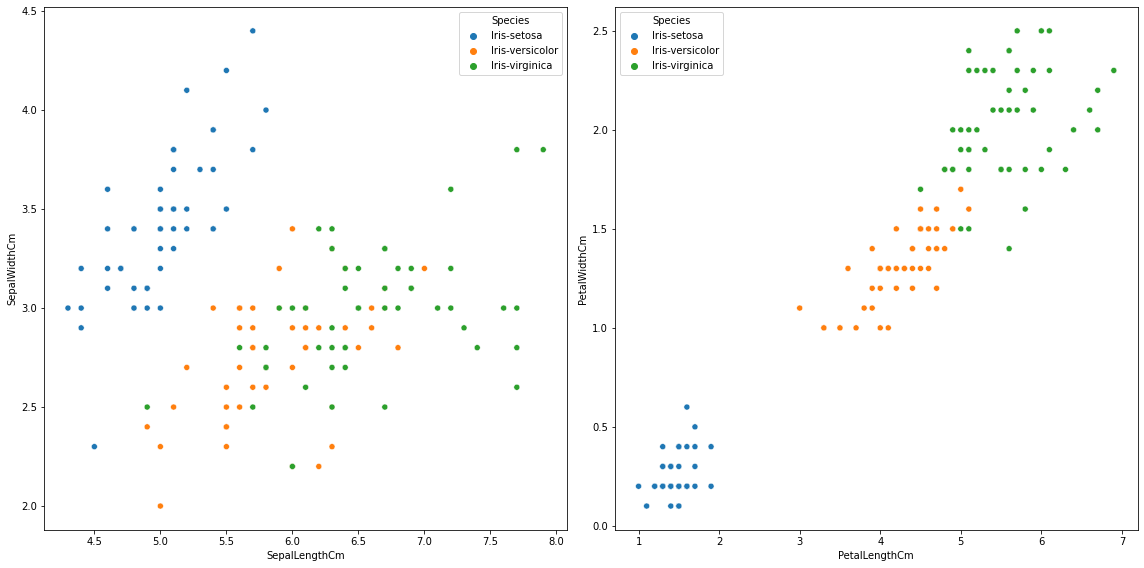

In [7]:
# Scatter plot based on dimension of Sepal and Petal

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(16,8))
sns.scatterplot(x = data['SepalLengthCm'], y = data['SepalWidthCm'], hue = data['Species'], ax=ax0)
sns.scatterplot(x = data['PetalLengthCm'], y = data['PetalWidthCm'], hue = data['Species'], ax=ax1)
plt.tight_layout()

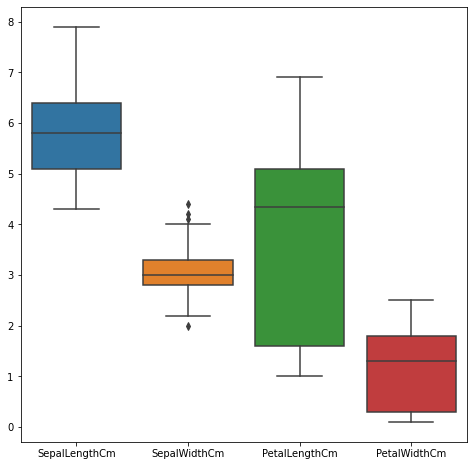

In [8]:
# box plot of different features

plt.figure(figsize=(8,8))
sns.boxplot(data = data.drop('Id', axis=1));

# Data Preprocessing

In [9]:
# abstraction of independent and dependent variables

X, y = data.drop(['Id', 'Species'], axis=1), data['Species']
print(X.shape, y.shape)

(150, 4) (150,)


In [10]:
# encoing categorical values

enc = LabelEncoder()
y = enc.fit_transform(y)

In [11]:
# splitting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
print(y_train.shape, y_test.shape)

(120,) (30,)


In [12]:
# feature scaling

st = StandardScaler()
X_train = st.fit_transform(X_train)
X_test = st.transform(X_test)

In [13]:
scores = pd.DataFrame(columns = ['Model','Training', 'Testing'])

# 1. Logistic Regression

In [14]:
# finding the best parameters using grid search

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(), param_grid = param_grid, cv=3).fit(X_train, y_train)
print('Score: {:.3f}'.format(grid.score(X_test, y_test)))
print('Best Estimator: {}'.format(grid.best_estimator_))

Score: 1.000
Best Estimator: LogisticRegression(C=100)


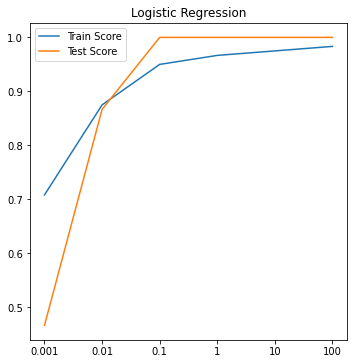

In [15]:
# visualization of effect of the parameter

fig = plt.figure(figsize=(4, 4))

param = [0.001, 0.01, 0.1, 1, 10, 100]
x = np.linspace(0,5,6)

ax = fig.add_axes([1,1,1.1,1.1])
ax.set_xticks(x)
ax.set_xticklabels(param)

test_score = np.array([])
train_score = np.array([])
for i in param:
    clf = LogisticRegression(C=i).fit(X_train, y_train)
    train_score = np.append(train_score, clf.score(X_train, y_train))
    test_score = np.append(test_score, clf.score(X_test, y_test))

ax.plot(x, train_score, label='Train Score')
ax.plot(x, test_score, label='Test Score')
ax.set_title('Logistic Regression')
ax.legend();

In [16]:
# checking score of data across different folds using cross_val_score

cvs = cross_val_score(LogisticRegression(C=100, max_iter=1000), X, y, cv=5)
print('Cross Validation Scores: {:.3f} {:.3f} {:.3f} {:.3f} {:.3f}'.format(*cvs))

Cross Validation Scores: 1.000 1.000 0.967 0.933 1.000


In [17]:
# fitting the training set in the model and appending the scores to the DataFrame

clf = LogisticRegression(C=100).fit(X_train, y_train)

training_s = np.round(clf.score(X_train, y_train), 3)
testing_s = np.round(clf.score(X_test, y_test), 3)

print('Training Score: {}'.format(training_s))
print('Testing Score: {}'.format(testing_s))

scores = scores.append({'Model':'LogisticRegression','Training':training_s,'Testing':testing_s}, ignore_index=True)

Training Score: 0.983
Testing Score: 1.0


In [18]:
# classification report of the model

print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00        16

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# 2. Gaussian Naive Bayes

In [19]:
# fitting the training set in the model and appending the scores to the DataFrame

clf = GaussianNB().fit(X_train, y_train)

training_s = np.round(clf.score(X_train, y_train), 3)
testing_s = np.round(clf.score(X_test, y_test), 3)

print('Training Score: {}'.format(training_s))
print('Testing Score: {}'.format(testing_s))

scores = scores.append({'Model':'GaussianNB','Training':training_s,'Testing':testing_s}, ignore_index=True)

Training Score: 0.95
Testing Score: 1.0


In [20]:
# classification report of the model

print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00        16

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# 3. K-Neighbors Classifier

In [21]:
# finding the best parameters using grid search

param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
grid = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid, cv=3).fit(X_train, y_train)
print('Score: {:.3f}'.format(grid.score(X_test, y_test)))
print('Best Estimator: {}'.format(grid.best_estimator_))

Score: 0.967
Best Estimator: KNeighborsClassifier(n_neighbors=7)


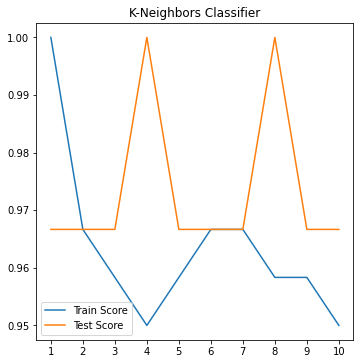

In [22]:
# visualization of effect of the parameter

fig = plt.figure(figsize=(4, 4))

param = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
x = np.linspace(0,9,10)

ax = fig.add_axes([1,1,1.1,1.1])
ax.set_xticks(x)
ax.set_xticklabels(param)

test_score = np.array([])
train_score = np.array([])
for i in param:
    clf = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    train_score = np.append(train_score, clf.score(X_train, y_train))
    test_score = np.append(test_score, clf.score(X_test, y_test))

ax.plot(x, train_score, label='Train Score')
ax.plot(x, test_score, label='Test Score')
ax.set_title('K-Neighbors Classifier')
ax.legend();

In [23]:
# checking score of data across different folds using cross_val_score

cvs = cross_val_score(KNeighborsClassifier(n_neighbors=7), X, y, cv=5)
print('Cross Validation Scores: {:.3f} {:.3f} {:.3f} {:.3f} {:.3f}'.format(*cvs))

Cross Validation Scores: 0.967 1.000 0.967 0.967 1.000


In [24]:
# fitting the training set in the model and appending the scores to the DataFrame

clf = KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)

training_s = np.round(clf.score(X_train, y_train), 3)
testing_s = np.round(clf.score(X_test, y_test), 3)

print('Training Score: {}'.format(training_s))
print('Testing Score: {}'.format(testing_s))

scores = scores.append({'Model':'KNeighborsClassifier','Training':training_s,'Testing':testing_s}, ignore_index=True)

Training Score: 0.967
Testing Score: 0.967


In [25]:
# classification report of the model

print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.75      0.86         4
           2       0.94      1.00      0.97        16

    accuracy                           0.97        30
   macro avg       0.98      0.92      0.94        30
weighted avg       0.97      0.97      0.96        30



# 4. Support Vector Classifier

In [26]:
# finding the best parameters using grid search

param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10, 100], 'kernel':['linear', 'rbf', 'poly']}
grid = GridSearchCV(SVC(), param_grid = param_grid, cv=3).fit(X_train, y_train)
print('Score: {:.3f}'.format(grid.score(X_test, y_test)))
print('Best Estimator: {}'.format(grid.best_estimator_))

Score: 0.967
Best Estimator: SVC(C=1, gamma=0.01, kernel='linear')


In [27]:
# checking score of data across different folds using cross_val_score

cvs = cross_val_score(SVC(C=1, gamma=0.01, kernel='linear'), X, y, cv=5)
print('Cross Validation Scores: {:.3f} {:.3f} {:.3f} {:.3f} {:.3f}'.format(*cvs))

Cross Validation Scores: 0.967 1.000 0.967 0.967 1.000


In [28]:
# fitting the training set in the model and appending the scores to the DataFrame

clf = SVC(C=1, gamma=0.01, kernel='linear').fit(X_train, y_train)

training_s = np.round(clf.score(X_train, y_train), 3)
testing_s = np.round(clf.score(X_test, y_test), 3)

print('Training Score: {}'.format(training_s))
print('Testing Score: {}'.format(testing_s))

scores = scores.append({'Model':'SVC','Training':training_s,'Testing':testing_s}, ignore_index=True)

Training Score: 0.958
Testing Score: 0.967


In [29]:
# classification report of the model

print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.75      0.86         4
           2       0.94      1.00      0.97        16

    accuracy                           0.97        30
   macro avg       0.98      0.92      0.94        30
weighted avg       0.97      0.97      0.96        30



# 5. Decision Tree Classifier

In [30]:
# finding the best parameters using grid search

param_grid = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid = param_grid, cv=3).fit(X_train, y_train)
print('Score: {:.3f}'.format(grid.score(X_test, y_test)))
print('Best Estimator: {}'.format(grid.best_estimator_))

Score: 0.967
Best Estimator: DecisionTreeClassifier(max_depth=2)


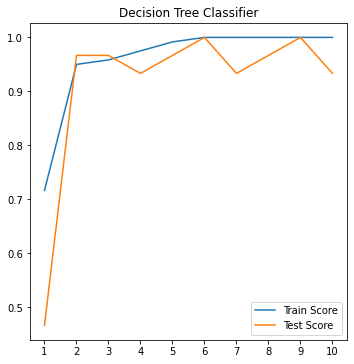

In [31]:
# visualization of effect of the parameter

fig = plt.figure(figsize=(4, 4))

param = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
x = np.linspace(0,9,10)

ax = fig.add_axes([1,1,1.1,1.1])
ax.set_xticks(x)
ax.set_xticklabels(param)

test_score = np.array([])
train_score = np.array([])
for i in param:
    clf = DecisionTreeClassifier(max_depth=i).fit(X_train, y_train)
    train_score = np.append(train_score, clf.score(X_train, y_train))
    test_score = np.append(test_score, clf.score(X_test, y_test))

ax.plot(x, train_score, label='Train Score')
ax.plot(x, test_score, label='Test Score')
ax.set_title('Decision Tree Classifier')
ax.legend();

In [32]:
# checking score of data across different folds using cross_val_score

cvs = cross_val_score(DecisionTreeClassifier(max_depth=2), X, y, cv=5)
print('Cross Validation Scores: {:.3f} {:.3f} {:.3f} {:.3f} {:.3f}'.format(*cvs))

Cross Validation Scores: 0.933 0.967 0.900 0.867 1.000


In [33]:
# fitting the training set in the model and appending the scores to the DataFrame

clf = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)

training_s = np.round(clf.score(X_train, y_train), 3)
testing_s = np.round(clf.score(X_test, y_test), 3)

print('Training Score: {}'.format(training_s))
print('Testing Score: {}'.format(testing_s))

scores = scores.append({'Model':'DecisionTreeClassifier','Training':training_s,'Testing':testing_s}, ignore_index=True)

Training Score: 0.95
Testing Score: 0.967


In [34]:
# classification report of the model

print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.75      0.86         4
           2       0.94      1.00      0.97        16

    accuracy                           0.97        30
   macro avg       0.98      0.92      0.94        30
weighted avg       0.97      0.97      0.96        30



# 6. Random Forest Classifier

In [35]:
# finding the best parameters using grid search

param_grid = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
grid = GridSearchCV(RandomForestClassifier(), param_grid = param_grid, cv=5).fit(X_train, y_train)
print('Score: {:.3f}'.format(grid.score(X_test, y_test)))
print('Best Estimator: {}'.format(grid.best_estimator_))

Score: 0.967
Best Estimator: RandomForestClassifier(max_depth=9)


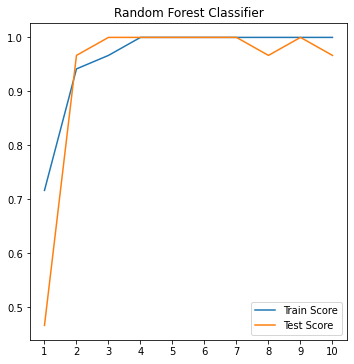

In [36]:
# visualization of effect of the parameter

fig = plt.figure(figsize=(4, 4))

param = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
x = np.linspace(0,9,10)

ax = fig.add_axes([1,1,1.1,1.1])
ax.set_xticks(x)
ax.set_xticklabels(param)

test_score = np.array([])
train_score = np.array([])
for i in param:
    clf = RandomForestClassifier(max_depth=i).fit(X_train, y_train)
    train_score = np.append(train_score, clf.score(X_train, y_train))
    test_score = np.append(test_score, clf.score(X_test, y_test))

ax.plot(x, train_score, label='Train Score')
ax.plot(x, test_score, label='Test Score')
ax.set_title('Random Forest Classifier')
ax.legend();

In [37]:
# checking score of data across different folds using cross_val_score

cvs = cross_val_score(RandomForestClassifier(max_depth=9), X, y, cv=5)
print('Cross Validation Scores: {:.3f} {:.3f} {:.3f} {:.3f} {:.3f}'.format(*cvs))

Cross Validation Scores: 0.967 0.967 0.933 0.933 1.000


In [38]:
# fitting the training set in the model and appending the scores to the DataFrame

clf = RandomForestClassifier(max_depth=9).fit(X_train, y_train)

training_s = np.round(clf.score(X_train, y_train), 3)
testing_s = np.round(clf.score(X_test, y_test), 3)

print('Training Score: {}'.format(training_s))
print('Testing Score: {}'.format(testing_s))

scores = scores.append({'Model':'RandomForestClassifier','Training':training_s,'Testing':testing_s}, ignore_index=True)

Training Score: 1.0
Testing Score: 1.0


In [39]:
# classification report of the model

print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00        16

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# 7. Gradient Boosting Classifier

In [40]:
# finding the best parameters using grid search

param_grid = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
grid = GridSearchCV(GradientBoostingClassifier(), param_grid = param_grid, cv=4).fit(X_train, y_train)
print('Score: {:.3f}'.format(grid.score(X_test, y_test)))
print('Best Estimator: {}'.format(grid.best_estimator_))

Score: 1.000
Best Estimator: GradientBoostingClassifier(max_depth=2)


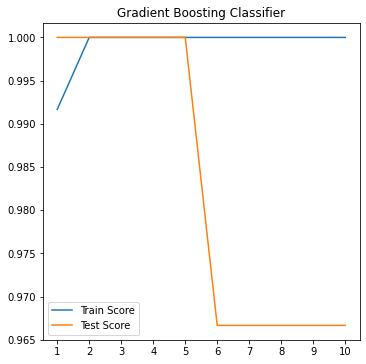

In [41]:
# visualization of effect of the parameter

fig = plt.figure(figsize=(4, 4))

param = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
x = np.linspace(0,9,10)

ax = fig.add_axes([1,1,1.1,1.1])
ax.set_xticks(x)
ax.set_xticklabels(param)

test_score = np.array([])
train_score = np.array([])
for i in param:
    clf = GradientBoostingClassifier(max_depth=i).fit(X_train, y_train)
    train_score = np.append(train_score, clf.score(X_train, y_train))
    test_score = np.append(test_score, clf.score(X_test, y_test))

ax.plot(x, train_score, label='Train Score')
ax.plot(x, test_score, label='Test Score')
ax.set_title('Gradient Boosting Classifier')
ax.legend();

In [42]:
# checking score of data across different folds using cross_val_score

cvs = cross_val_score(GradientBoostingClassifier(max_depth=2), X, y, cv=5)
print('Cross Validation Scores: {:.3f} {:.3f} {:.3f} {:.3f} {:.3f}'.format(*cvs))

Cross Validation Scores: 0.967 0.967 0.900 0.933 1.000


In [43]:
# fitting the training set in the model and appending the scores to the DataFrame

clf = GradientBoostingClassifier(max_depth=2).fit(X_train, y_train)

training_s = np.round(clf.score(X_train, y_train), 3)
testing_s = np.round(clf.score(X_test, y_test), 3)

print('Training Score: {}'.format(training_s))
print('Testing Score: {}'.format(testing_s))

scores = scores.append({'Model':'GradientBoostingClassifier','Training':training_s,'Testing':testing_s}, ignore_index=True)

Training Score: 1.0
Testing Score: 1.0


In [44]:
# classification report of the model

print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00        16

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# 8. Multilayer Perceptron Classifier (Neural Networks)

In [45]:
# finding the best parameters using grid search

param_grid = {'hidden_layer_sizes': [[5], [10], [5,5], [10,10]], 'alpha': [0.01, 0.1, 1, 10]}
grid = GridSearchCV(MLPClassifier(solver='lbfgs', max_iter=1000), param_grid = param_grid, cv=3).fit(X_train, y_train)
print('Score: {:.3f}'.format(grid.score(X_test, y_test)))
print('Best Estimator: {}'.format(grid.best_estimator_))

Score: 1.000
Best Estimator: MLPClassifier(alpha=1, hidden_layer_sizes=[5, 5], max_iter=1000, solver='lbfgs')


In [46]:
# checking score of data across different folds using cross_val_score

cvs = cross_val_score(MLPClassifier(alpha=1, hidden_layer_sizes=[5,5], max_iter=1000, solver='lbfgs'), X, y, cv=5)
print('Cross Validation Scores: {:.3f} {:.3f} {:.3f} {:.3f} {:.3f}'.format(*cvs))

Cross Validation Scores: 0.967 1.000 0.967 0.967 1.000


In [47]:
# fitting the training set in the model and appending the scores to the DataFrame

clf = MLPClassifier(alpha=1, hidden_layer_sizes=[5,5], max_iter=1000, solver='lbfgs').fit(X_train, y_train)

training_s = np.round(clf.score(X_train, y_train), 3)
testing_s = np.round(clf.score(X_test, y_test), 3)

print('Training Score: {}'.format(training_s))
print('Testing Score: {}'.format(testing_s))

scores = scores.append({'Model':'MLPClassifier','Training':training_s,'Testing':testing_s}, ignore_index=True)

Training Score: 0.983
Testing Score: 1.0


In [48]:
# classification report of the model

print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00        16

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Performance Comparison

In [75]:
# best to worst model performance

scores = scores.reindex(scores.mean(axis=1).sort_values()[::-1].index)
scores

,Model,Training,Testing
5,RandomForestClassifier,1.000,1.000
6,GradientBoostingClassifier,1.000,1.000
0,LogisticRegression,0.983,1.000
7,MLPClassifier,0.983,1.000
1,GaussianNB,0.950,1.000
2,KNeighborsClassifier,0.967,0.967
3,SVC,0.958,0.967
4,DecisionTreeClassifier,0.950,0.967


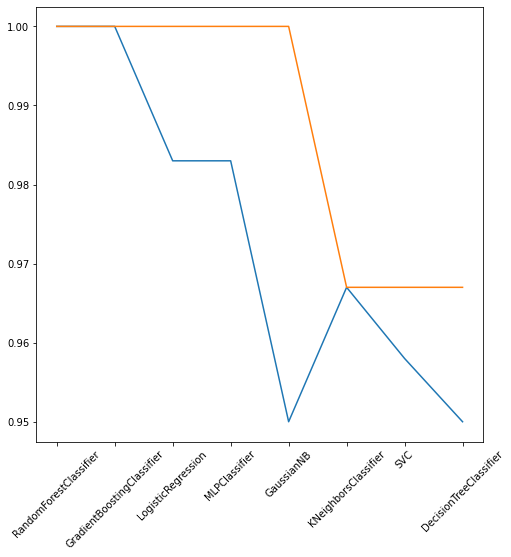

In [77]:
# plot of respective models

plt.figure(figsize=(8,8))
plt.plot(scores['Model'], scores['Training'], label='Train Score')
plt.plot(scores['Model'], scores['Testing'], label='Test Score')
plt.tick_params(axis='x', rotation=45)

# Conslusion

#### - We can observe that the RandomForestClassifier and GradientBoostingClassifier fits the data very well resulting in a good performance.
#### - The LogisticRegression and MLPClassifier fits the data quite good as well but not as good as RandomForest and GradientBoosting
#### - However, GaussianNBClassifier, KNeighborsClassifier, SVC and DecisionTreeClassifier does not fit the data equally as good.
<br>

### The best model to use for this dataset would be LogisticRegression if considering the time taken to train the model, and RandomForestClassifier/GradientBoostingClassifier if complexity can be compromised but best results are required.